In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
control_df = pd.read_csv("Downloads/control_group.csv", sep = ';')
test_df = pd.read_csv("Downloads/test_group.csv", sep = ';')

In [3]:
control_df.head()


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_df.head()


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [6]:
control_df.columns = ['Campaign Name', 'Date', 'Amount Spend', 'Number of Impressions',
'Reach', 'Website Clicks', 'Searches Received', 'Content Viewed',
'Added to Cart', 'Purchases']


In [7]:
test_df.columns = ['Campaign Name', 'Date', 'Amount Spend', 'Number of Impressions',
'Reach', 'Website Clicks', 'Searches Received', 'Content Viewed',
'Added to Cart', 'Purchases']

In [8]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Campaign Name          30 non-null     object
 1   Date                   30 non-null     object
 2   Amount Spend           30 non-null     int64 
 3   Number of Impressions  30 non-null     int64 
 4   Reach                  30 non-null     int64 
 5   Website Clicks         30 non-null     int64 
 6   Searches Received      30 non-null     int64 
 7   Content Viewed         30 non-null     int64 
 8   Added to Cart          30 non-null     int64 
 9   Purchases              30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [9]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Campaign Name          30 non-null     object 
 1   Date                   30 non-null     object 
 2   Amount Spend           30 non-null     int64  
 3   Number of Impressions  29 non-null     float64
 4   Reach                  29 non-null     float64
 5   Website Clicks         29 non-null     float64
 6   Searches Received      29 non-null     float64
 7   Content Viewed         29 non-null     float64
 8   Added to Cart          29 non-null     float64
 9   Purchases              29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [10]:
control_df['Date'] = pd.to_datetime(control_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])


In [11]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Campaign Name          30 non-null     object        
 1   Date                   30 non-null     datetime64[ns]
 2   Amount Spend           30 non-null     int64         
 3   Number of Impressions  29 non-null     float64       
 4   Reach                  29 non-null     float64       
 5   Website Clicks         29 non-null     float64       
 6   Searches Received      29 non-null     float64       
 7   Content Viewed         29 non-null     float64       
 8   Added to Cart          29 non-null     float64       
 9   Purchases              29 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB


In [12]:
test_df.isnull().sum()

Campaign Name            0
Date                     0
Amount Spend             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [13]:
control_df.isnull().sum()


Campaign Name            0
Date                     0
Amount Spend             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [14]:
 control_df['Number of Impressions'].fillna(value= control_df['Number of Impressions'].mean(),
inplace= True)
control_df['Reach'].fillna(value= control_df['Reach'].mean(),
inplace= True)
control_df['Website Clicks'].fillna(value= control_df['Website Clicks'].mean(),
inplace= True)
control_df['Searches Received'].fillna(value= control_df['Searches Received'].mean(),
inplace= True)
control_df['Content Viewed'].fillna(value= control_df['Content Viewed'].mean(),
inplace= True)
control_df['Added to Cart'].fillna(value= control_df['Added to Cart'].mean(),
inplace= True)
control_df['Purchases'].fillna(value= control_df['Purchases'].mean(),
inplace= True)


In [15]:
control_df.isnull().sum()

Campaign Name            0
Date                     0
Amount Spend             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [18]:
df = control_df.merge(test_df,
how= 'outer').sort_values(['Date'])

In [19]:
df = df.reset_index(drop = True)
df.head()

,Campaign Name,Date,Amount Spend,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Control Campaign,2019-02-08,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
3,Test Campaign,2019-02-08,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
4,Control Campaign,2019-03-08,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Campaign Name          60 non-null     object        
 1   Date                   60 non-null     datetime64[ns]
 2   Amount Spend           60 non-null     int64         
 3   Number of Impressions  60 non-null     float64       
 4   Reach                  60 non-null     float64       
 5   Website Clicks         60 non-null     float64       
 6   Searches Received      60 non-null     float64       
 7   Content Viewed         60 non-null     float64       
 8   Added to Cart          60 non-null     float64       
 9   Purchases              60 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 4.8+ KB


In [22]:
df.describe()

,Amount Spend,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2425.750000,92072.279310,71168.248851,5676.563218,2320.138506,1900.896552,1090.766667,522.013218
std,381.130461,32270.541283,30847.039691,1740.469866,663.473391,681.437956,427.427479,195.297540
min,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,2073.750000,69558.250000,43235.500000,4230.750000,1970.750000,1249.000000,863.250000,340.000000
50%,2420.500000,98281.000000,77422.000000,5581.000000,2374.500000,1959.396552,1082.500000,506.000000
75%,2727.500000,117160.500000,95314.250000,7201.250000,2755.750000,2422.500000,1384.250000,685.000000
max,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000


In [23]:
#Click Through Rate:
df['CTR'] = (df['Website Clicks'] / df['Number of Impressions']) * 100
#Cost Per Click:
df['CPC'] = df['Amount Spend'] / df['Website Clicks']
#Conversion Rate:
df['conversion_rate'] = (df['Purchases'] / df['Website Clicks']) * 100
#Cost Per Conversion:
df['cost_per_conversion'] = df['Amount Spend'] / df['Purchases']
#Added to Cart Rate:
df['ACR'] = (df['Added to Cart'] / df['Website Clicks']) * 100
#Cost Per Impressions:
df['CPM'] = (df['Amount Spend'] / df['Number of Impressions']) * 1000

In [24]:
df.head()


,Campaign Name,Date,Amount Spend,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases,CTR,CPC,conversion_rate,cost_per_conversion,ACR,CPM
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,8.483471,0.324971,8.808438,3.689320,25.926454,27.568862
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,7.681416,0.990125,8.393680,11.796078,29.427255,76.055626
2,Control Campaign,2019-02-08,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,6.700264,0.216646,6.300863,3.438356,15.030826,14.515863
3,Test Campaign,2019-02-08,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0,4.623755,0.545845,14.537256,3.754801,18.874812,25.238535
4,Control Campaign,2019-03-08,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,4.941121,0.360018,5.716042,6.298387,17.424708,17.788947


In [25]:
campaign_ctr = df.groupby('Campaign Name')['CTR'].mean().reset_index()
campaign_ctr

,Campaign Name,CTR
0,Control Campaign,5.087893
1,Test Campaign,10.242260


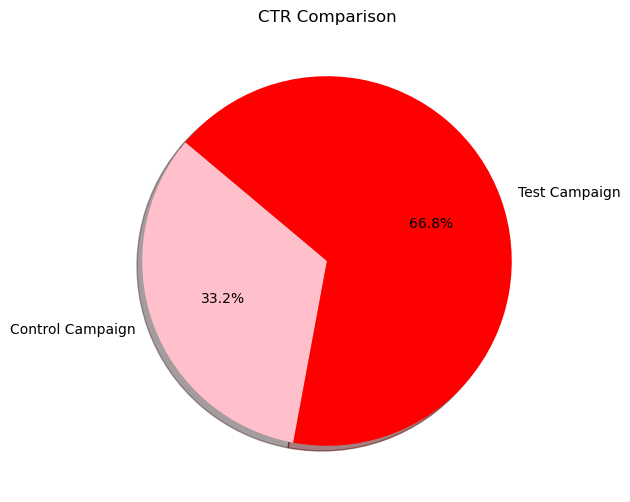

In [26]:
values = campaign_ctr['CTR']
labels = campaign_ctr['Campaign Name']
colors = ['Pink','Red']
plt.figure(figsize=(10,6))
plt.pie(values, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle= 140)
plt.title('CTR Comparison')
plt.show()


In [27]:
campaign_cpc = df.groupby('Campaign Name')['CPC'].mean().reset_index()
campaign_cpc


,Campaign Name,CPC
0,Control Campaign,0.489907
1,Test Campaign,0.468718


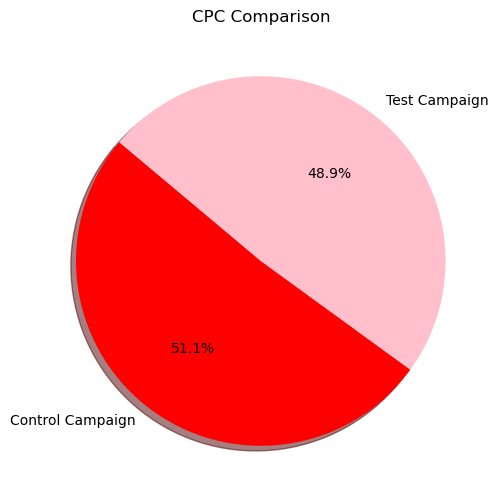

In [28]:
 values = campaign_cpc['CPC']
labels = campaign_cpc['Campaign Name']
colors = ['Red','Pink']

plt.figure(figsize=(10,6))
plt.pie(values, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle= 140)
plt.title('CPC Comparison')
plt.show()


In [29]:
campaign_conversion = df.groupby('Campaign Name')['conversion_rate'].mean().reset_index()
campaign_conversion

,Campaign Name,conversion_rate
0,Control Campaign,11.422146
1,Test Campaign,9.231182


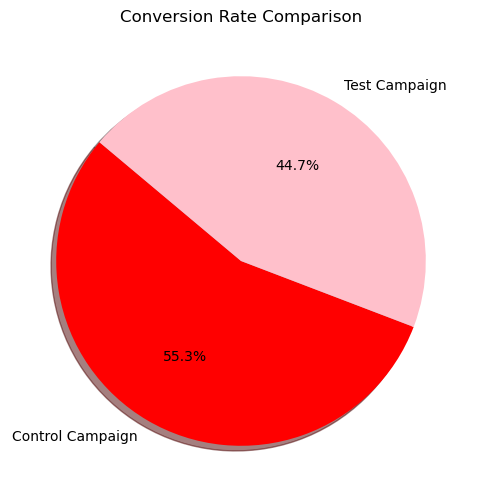

In [30]:
values = campaign_conversion['conversion_rate']
labels = campaign_conversion['Campaign Name']
colors = ['Red','Pink']
plt.figure(figsize=(10,6))
plt.pie(values, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle= 140)
plt.title('Conversion Rate Comparison')
plt.show()

In [32]:
campaign_cost_of_conversion = df.groupby('Campaign Name')['cost_per_conversion'].mean().reset_index()
campaign_cost_of_conversion


,Campaign Name,cost_per_conversion
0,Control Campaign,5.000927
1,Test Campaign,5.899589


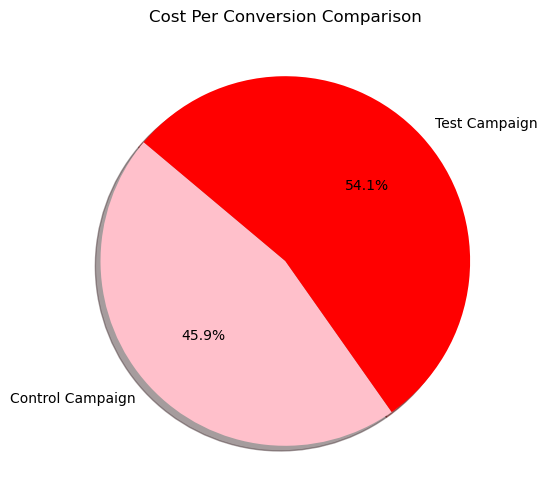

In [34]:
values = campaign_cost_of_conversion['cost_per_conversion']
labels = campaign_cost_of_conversion['Campaign Name']
colors = ['Pink','Red']
plt.figure(figsize=(10,6))
plt.pie(values, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle= 140)
plt.title('Cost Per Conversion Comparison')
plt.show()


In [35]:
campaign_acr = df.groupby('Campaign Name')['ACR'].mean().reset_index()
campaign_acr

,Campaign Name,ACR
0,Control Campaign,27.707909
1,Test Campaign,15.791233


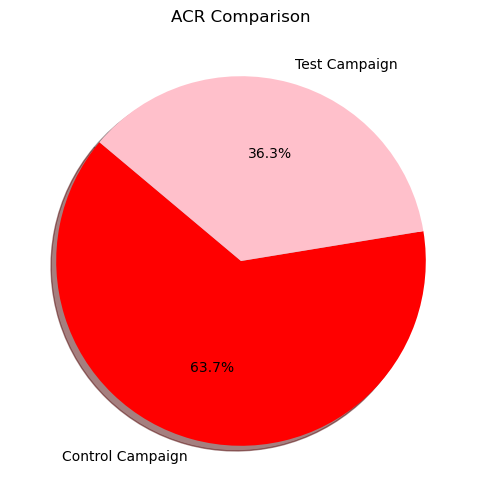

In [36]:
values = campaign_acr['ACR']
labels = campaign_acr['Campaign Name']
colors = ['Red','Pink']
plt.figure(figsize=(10,6))
plt.pie(values, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle= 140)
plt.title('ACR Comparison')
plt.show()

In [37]:
campaign_cpm = df.groupby('Campaign Name')['CPM'].mean().reset_index()
campaign_cpm


,Campaign Name,CPM
0,Control Campaign,21.550149
1,Test Campaign,42.681041


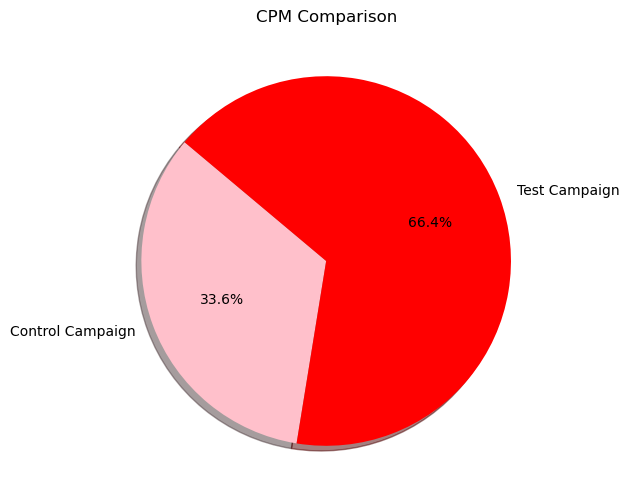

In [39]:
values = campaign_cpm['CPM']
labels = campaign_cpm['Campaign Name']
colors = ['Pink','Red']
plt.figure(figsize=(10,6))
plt.pie(values, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle= 140)
plt.title('CPM Comparison')
plt.show()

In [40]:
campaigns = df['Campaign Name'].unique()
campaigns


array(['Control Campaign', 'Test Campaign'], dtype=object)

In [41]:
campaign_reach = df.groupby('Campaign Name')['Reach'].mean().reset_index()
campaign_reach


,Campaign Name,Reach
0,Control Campaign,88844.931034
1,Test Campaign,53491.566667


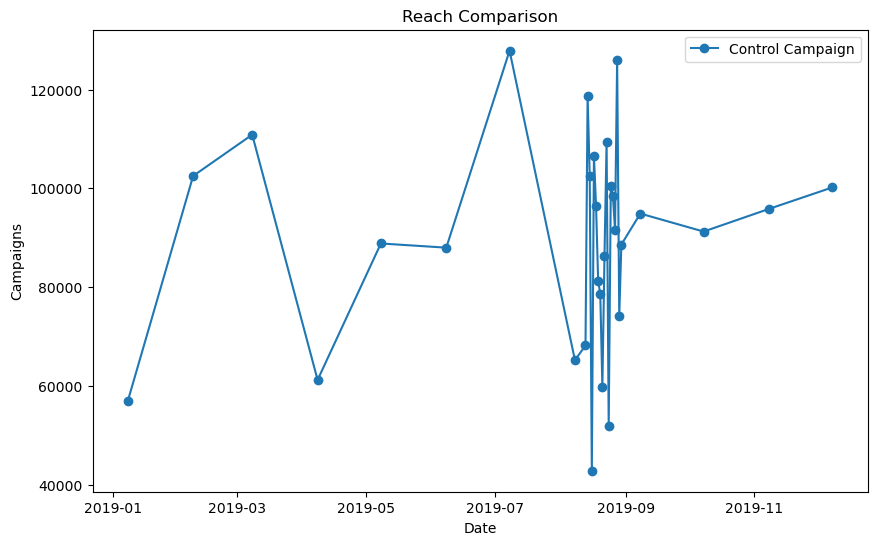

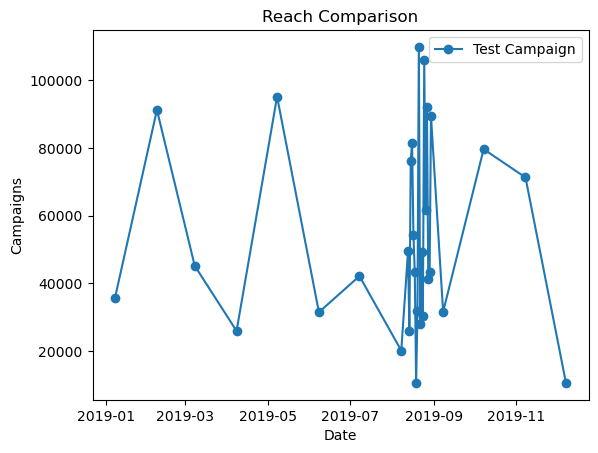

In [44]:
plt.figure(figsize=(10,6))
for campaign in campaigns:
        campaign_data = df[df['Campaign Name'] == campaign]
        plt.plot(campaign_data['Date'], campaign_data['Reach'], marker = 'o',linestyle = '-', label = f'{campaign}')
        plt.xlabel('Date')
        plt.ylabel('Campaigns')
        plt.title("Reach Comparison")
        plt.legend()
        plt.show()


In [45]:
campaign_searches = df.groupby('Campaign Name')['Searches Received'].mean().reset_index()
campaign_searches

,Campaign Name,Searches Received
0,Control Campaign,2221.310345
1,Test Campaign,2418.966667


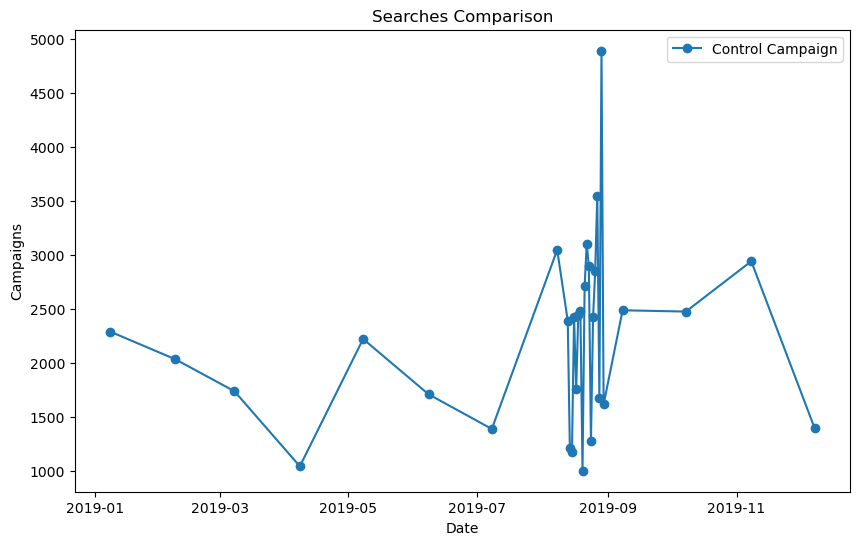

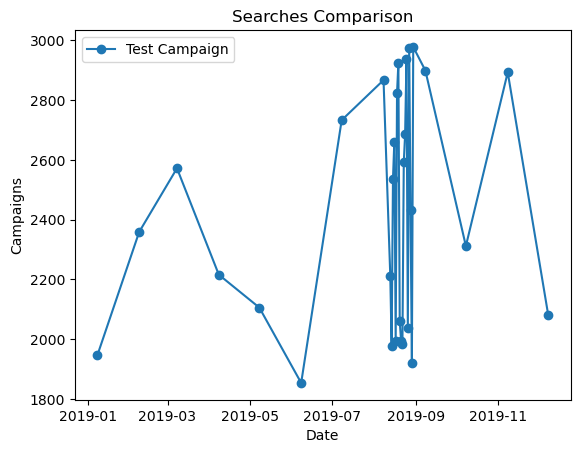

In [47]:
plt.figure(figsize=(10,6))
for campaign in campaigns:
        campaign_data = df[df['Campaign Name'] == campaign]
        plt.plot(campaign_data['Date'], campaign_data['Searches Received'], marker= 'o', linestyle = '-', label = f'{campaign}')
        plt.xlabel('Date')
        plt.ylabel('Campaigns')
        plt.title("Searches Comparison")

        plt.legend()
        plt.show()

In [48]:
campaign_views = df.groupby('Campaign Name')['Content Viewed'].mean().reset_index()
campaign_views

,Campaign Name,Content Viewed
0,Control Campaign,1943.793103
1,Test Campaign,1858.000000


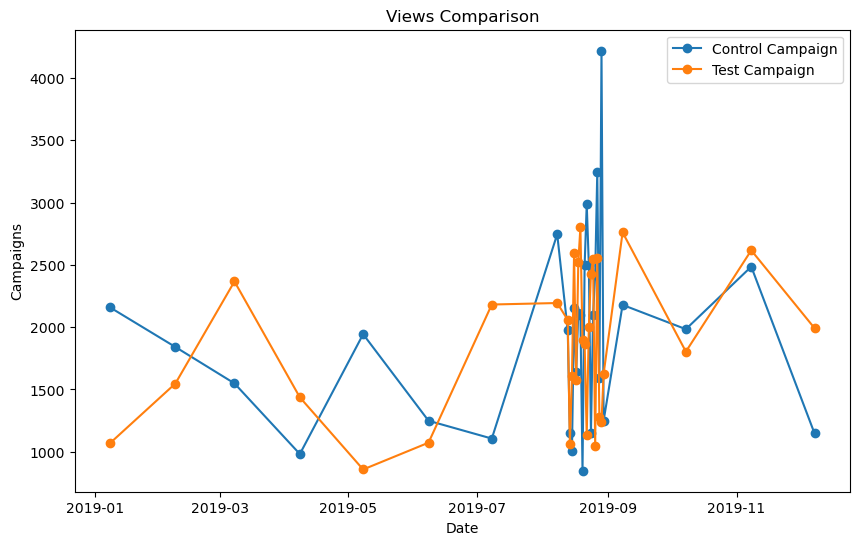

In [50]:
plt.figure(figsize=(10,6))
for campaign in campaigns:
        campaign_data = df[df['Campaign Name'] == campaign]
        plt.plot(campaign_data['Date'], campaign_data['Content Viewed'], marker ='o', linestyle = '-', label = f'{campaign}')

        plt.xlabel('Date')
        plt.ylabel('Campaigns')
        plt.title("Views Comparison")
        plt.legend()


6 Overall Conclusion:
6.0.1 Insights:
• Control campaign has a lower average Click-Through Rate (CTR) compared to the Test
campaign, indicating weaker engagement.
• Control campaign incurs a higher average Cost per Click (CPC) than the Test campaign,
suggesting that it’s more expensive to drive clicks in the Control group.
• Control campaign exhibits a higher average Conversion Rate compared to the Test campaign,
indicat
• Test campaign has a higher average Cost per Conversion compared to the Control campaign,
implying that conversions are more costly in the Test group.
• Control campaign shows a higher average Add to Cart Rate compared to the Test campaign,
indicating better engagement in adding products to the cart.
• Test campaign has a higher average Cost per Impressions (CPM) compared to the Control
campaign, suggesting higher costs for reaching a thousand impressions.


In [ ]:
6 Overall Conclusion:
6.0.1 Insights:
• Control campaign has a lower average Click-Through Rate (CTR) compared to the Test
campaign, indicating weaker engagement.
• Control campaign incurs a higher average Cost per Click (CPC) than the Test campaign,
suggesting that it’s more expensive to drive clicks in the Control group.
• Control campaign exhibits a higher average Conversion Rate compared to the Test campaign,
indicating a better rate of turning clicks into purchases.

• Test campaign has a higher average Cost per Conversion compared to the Control campaign,
implying that conversions are more costly in the Test group.
• Control campaign shows a higher average Add to Cart Rate compared to the Test campaign,
indicating better engagement in adding products to the cart.
• Test campaign has a higher average Cost per Impressions (CPM) compared to the Control
campaign, suggesting higher costs for reaching a thousand impressions.


6.0.2 Summary:
• Control campaign has lower CTR but better conversion rates and lower CPC.
• Test campaign incurs higher costs per conversion and impression but lower CTR and Add to
Cart rates.

6.0.3 Which Campaign is better?
Control Campaign:
• Higher Conversion Rate, indicating better at turning clicks into purchases.
• Lower CPC, suggesting cost-effective clicks.
• Higher Add to Cart Rate, indicating better engagement in adding products to the cart.
Test Campaign:
• Higher CTR, indicating better engagement at the click-through stage.
• Higher Cost per Conversion, suggesting conversions are more costly.
• Higher Cost per Impressions (CPM), implying higher costs for reaching impressions.


6.0.4 The choice of the “better” campaign depends on the company’s primary goals:
• If the company’s main goal is to maximize conversions and cost-efficiency in the conversion process, the Control Campaign may be considered better due to its higher
conversion rate and lower CPC.
• If the company’s primary focus is on generating initial user interest and engagement
(e.g., brand awareness), the Test Campaign with its higher CTR might be preferred.
• Lasly, If the company has specific budget constraints, it may need to evaluate which campaign
provides a better return on investment (ROI) based on the cost per conversion and overall
spend.